## An Introduction to Plots.jl

## Idea

Plots.jl is a non-traditional plotting library

- It does not implement a "plotting backend" itself, it's a plotting API
- The API is easily extendable via recipes


## Backends

Plots.jl uses other plotting libraries as backends

- PyPlot (matplotlob): Slow but dependable
- GR: Feature-rich and fast, but new
- Plotly/PlotlyJS: Interactive and good for web
- PGFPlots: Native LaTeX rendering
- UnicodePlots: Plots to unicode for no-display situations

## Using Backends

To switch backends, you simply use the name of the library: https://juliaplots.github.io/backends/


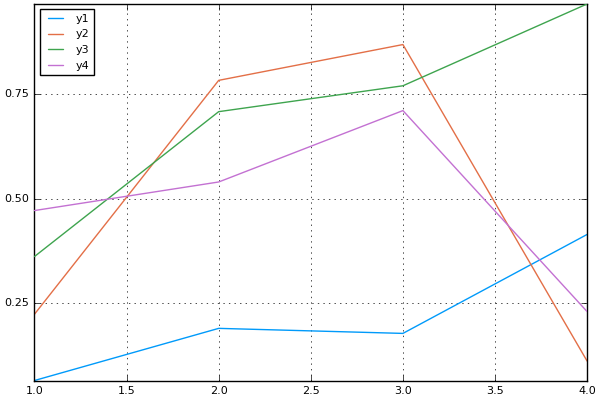

In [2]:
using Plots
pyplot() # Turns on the PyPlot backend
plot(rand(4,4))

In [4]:
gr()
plot(rand(4,4))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 4.0 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 
 
 
 
 
 
 
 y1 
 
 
 
 y2 
 
 
 
 y3 
 
 
 
 y4

In [7]:
plotly()
plot(rand(4,4))

## Attributes

The attributes work with each of the backends: https://juliaplots.github.io/attributes/

Compatibility of attributes is found in this chart: https://juliaplots.github.io/supported/

I find it easiest to use this page to find the right attributes: https://juliaplots.github.io/examples/pyplot/


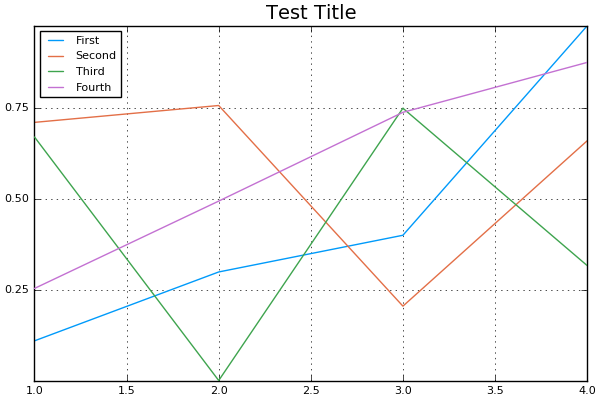

In [15]:
pyplot()
plot(rand(4,4),title="Test Title",label=["First" "Second" "Third" "Fourth"])

In [16]:
gr()
plot(rand(4,4),title="Test Title",label=["First" "Second" "Third" "Fourth"])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 4.0 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 Test Title 
 
 
 
 
 
 
 
 
 
 First 
 
 
 
 Second 
 
 
 
 Third 
 
 
 
 Fourth

In [17]:
plotly()
plot(rand(4,4),title="Test Title",label=["First" "Second" "Third" "Fourth"])

## Animations

Any plot can be animated

In [15]:
# initialize the attractor
n = 1500
dt = 0.02
σ, ρ, β = 10., 28., 8/3
x, y, z = 1., 1., 1.

# initialize a 3D plot with 1 empty series
plt = path3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                xlab = "x", ylab = "y", zlab = "z",
                title = "Lorenz Attractor", marker = 1)

# build an animated gif, saving every 10th frame
@gif for i=1:n
    dx = σ*(y - x)     ; x += dt * dx
    dy = x*(ρ - z) - y ; y += dt * dy
    dz = x*y - β*z     ; z += dt * dz
    push!(plt, x, y, z)
end every 10

INFO: Saved animation to C:\Users\Chris\.julia\v0.5\IntroToJulia\notebooks\tmp.gif


Plots.AnimatedGif("C:\\Users\\Chris\\.julia\\v0.5\\IntroToJulia\\notebooks\\tmp.gif")

## Recipes

Recipes are abstract instructions for how to "build a plot" from data. There are multiple kinds of recipes. In execution order:

- User Recipes: Provides dispatches to plotting
- Type Recipes: Says how to interpret the data of an abstract type
- Plot Recipes: A pre-processing recipe which builds a set of series plots and defaults
- Series Recipes: What most would think of as a "type of plot", i.e. scatter, histogram, etc.

Since these extend Plots.jl itself, all of Plots.jl is accessible from the plotting commands that these make, and these recipes are accessible from each other.

[Series recipes are used to extend the compatibility of backends itself!]

[Check out of the Plots Ecosystem!](https://juliaplots.github.io/ecosystem/)

## Type Recipe Example

In [24]:
using DifferentialEquations
sol = solve(prob_ode_linear)
@show typeof(sol)
plot(sol,title="The Attributes Still Work")

typeof(sol) = DifferentialEquations.ODESolution


## Plot and Type Recipes Together

StatsPlots provides a type recipe for how to read DataFrames, and a series recipe `marginalhist` which puts together histograms into a cohesive larger plot


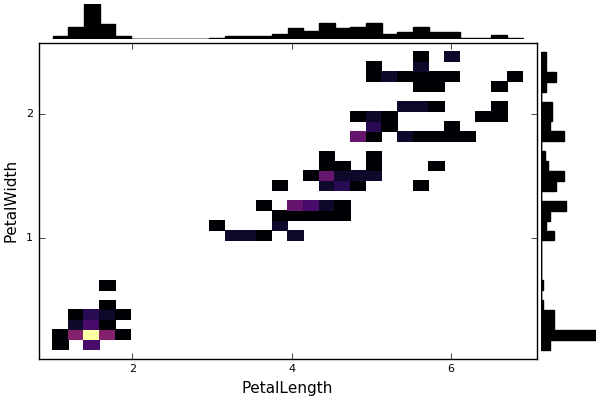

In [2]:
using RDatasets, StatPlots, Plots
iris = dataset("datasets","iris")
marginalhist(iris, :PetalLength, :PetalWidth)


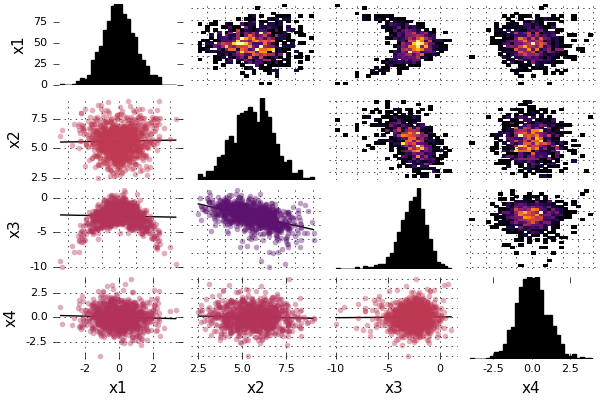

In [7]:
M = randn(1000,4)
M[:,2] += 0.8sqrt(abs(M[:,1])) - 0.5M[:,3] + 5
M[:,3] -= 0.7M[:,1].^2 + 2
corrplot(M, label = ["x$i" for i=1:4])


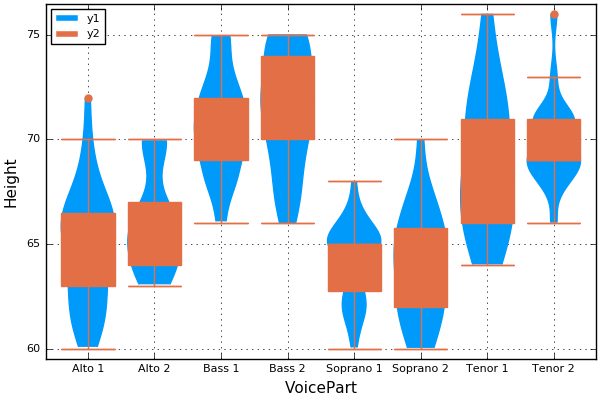

In [14]:
import RDatasets
pyplot()
singers = RDatasets.dataset("lattice","singer")
violin(singers,:VoicePart,:Height,marker=(0.2,:blue,stroke(0)))
boxplot!(singers,:VoicePart,:Height,marker=(0.3,:orange,stroke(2)))

## Series Type

A series type allows you to define an entirely new way of visualizing data into backends.


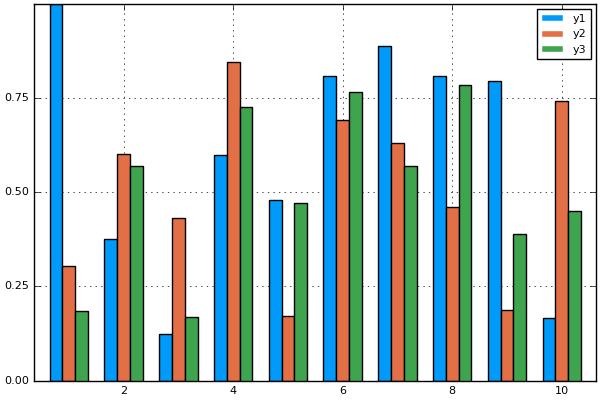

In [9]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

In [11]:
gr()
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2 
 
 
 4 
 
 
 6 
 
 
 8 
 
 
 10 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1 
 
 
 
 
 y2 
 
 
 
 
 y3

## Project: Regression Plot

Make a beautiful plot of your regression:

- Plot the values as a scatter plot
- Use the mutating plot (`plot!`) to add the linear regression line over the scatter plot
- Use Loess.jl to build a smoothed line, and see how that plots vs your linear regression
- Add a title, label the two lines in a legend, and label the `x` and `y` axis
- Try some other backends: which one do you like the best?